In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plot

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Array of events
events = {"Transaction Refund": 1,
            "Order": 0,
            "Account Setup Skip": 1,
            "Signup Success": 0,
            "Add Vehicle Success": 0,
            "Add Vehicle Break": 1,
            "Add Payment Method Success": 0,
            "Add Payment Method Failed": 2,
            "Email Confirmation Success": 0,
            "Chat Conversation Open": 0,
            "Sign Out": 1,
            "Account History Transaction Details": 0,
            "Wallet Opened": 0,
            "Subscription Premium": 0,
            "Subscription Premiun Cancel": 2,
            "Calculator View": 0}

# Creating massive for user IDs and their info
users = []
info = []

In [3]:
#reading data
data = pd.read_csv("int20h-ds-test-dataset.csv", delimiter = ",")
data

,userid,user_state,event_name,event_attributes,event_created_date,event_platform,device_manufacture,device_model
0,c95c777785faec8dd910d019d7278ebe,CA,Add Vehicle Success,"{""Make"":""Dodge"",""Model"":""Caravan"",""Color"":""Whi...",2022-01-16 17:03:04,android,samsung,SM-N975U
1,c95c777785faec8dd910d019d7278ebe,CA,Add Vehicle Break,{},2022-01-16 17:07:47,android,samsung,SM-N975U
2,f344be2d9a042b7444f3cc5279e38ef1,FL,Calculator View,{},2022-01-16 17:16:25,android,samsung,SM-G973U1
3,c95c777785faec8dd910d019d7278ebe,CA,Add Payment Method Success,"{""Payment Method"":""Credit"",""Tokenized Pay"":""""}",2022-01-16 17:24:22,android,samsung,SM-N975U
4,e331ed81422d8fba55520a43a872e701,IL,Sign Up Success,"{""Method"":""Apple""}",2022-01-16 17:34:51,ios,Apple,"iPhone12,1"
...,...,...,...,...,...,...,...,...
23352,679eba26c4e75e0afb178360becfa21b,CA,Add Payment Method Success,"{""Payment Method"":""Credit"",""Tokenized Pay"":"""",...",2022-04-16 20:49:24,android,Google,Pixel 3a
23353,679eba26c4e75e0afb178360becfa21b,CA,Account Setup Profile Skip,"{""Screen"":""Address""}",2022-04-16 20:50:05,android,Google,Pixel 3a
23354,679eba26c4e75e0afb178360becfa21b,CA,Account Setup Profile Skip,"{""Screen"":""Phone Number""}",2022-04-16 20:50:10,android,Google,Pixel 3a
23355,679eba26c4e75e0afb178360becfa21b,CA,Chat Conversation Opened,"{""From"":""Dashboard"",""Transaction type"":""""}",2022-04-16 20:50:31,android,Google,Pixel 3a


In [4]:
# Detecting of suspicious users
for row in (data.loc[:, ["userid", "event_name"]]).itertuples():
    add_corelation = events.get(row.event_name)
    if add_corelation == None: add_corelation = 0
    try:
        user_availability = users.index(row.userid)
    except ValueError:
        user_availability = -1
    if user_availability == -1:
        users.append(row.userid)
        info.append(add_corelation)
    else:
      index = users.index(row.userid)
      info[index] = info[index] + add_corelation

In [5]:
# Creating Pandas table
df = pd.DataFrame(
    {
        "User_ID": users,
        "Cancellation_Score": info,
    }
)
df
#df.to_csv('final.csv')

,User_ID,Cancellation_Score
0,c95c777785faec8dd910d019d7278ebe,1
1,f344be2d9a042b7444f3cc5279e38ef1,0
2,e331ed81422d8fba55520a43a872e701,0
3,f6d930969a59cfb488ed4d126c7c856d,0
4,4ddc1ecfc4f1a31c22bb1346ae6c7c5b,0
...,...,...
3535,6ebd67ba68c521c86d797a1c439d6de9,0
3536,833489856a3cc8840d47a2c1cadda36d,0
3537,679eba26c4e75e0afb178360becfa21b,0
3538,d46dcb2f00b6243de8714b979d524634,0


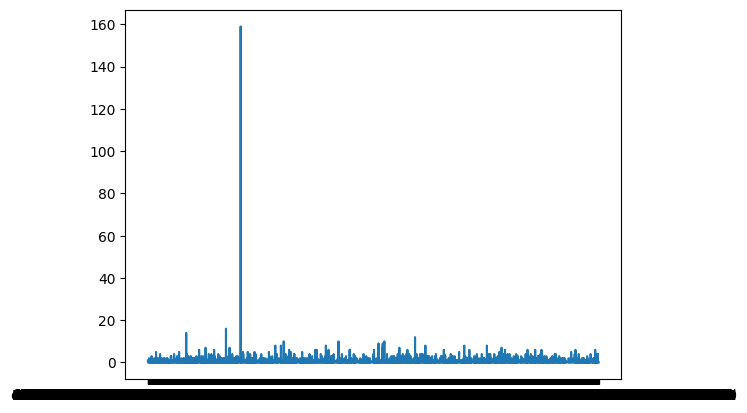

In [7]:
# Creating a plot for visualizing info
plot.plot(users, info)
plot.show()

In [8]:
print(f"Найбільш підозріла активність спостерігається від корситувача із ID {users[info.index(max(info))]}. Він набрав {max(info)} балів підозрілості")

Найбільш підозріла активність спостерігається від корситувача із ID f510005f651751e9dd7fcf15fab240c3. Він набрав 159 балів підозрілості
